In [1]:
from distmesh import *
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, triplot, tripcolor, axis, axes, show, plot
from scipy.spatial import Delaunay
import math

In [2]:
n = 11
t = np.linspace(-1,1,n)
rad = 1

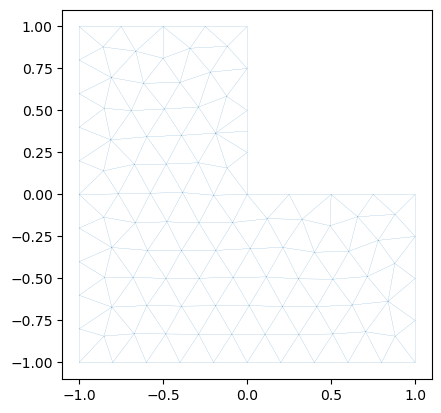

In [61]:
def dfunc(p):
    d0 = drectangle(p, -1, 1, -1, 1)
    d1 = drectangle(p, 0, 1, 0, 1)
    d = ddiff(d0, d1)
    return d

neg1_column = np.full_like(t, -1)
pos1_column = np.full_like(np.linspace(-1,0,5) , 1)
zero_column = np.full_like(np.linspace(-1,0,5) , 0)
bot_line = np.column_stack((t, neg1_column))
left_line = np.column_stack((neg1_column, t))[1:]
top_line = np.concatenate((np.column_stack((np.linspace(-1,0,5), pos1_column))[1:],
                          np.column_stack((np.linspace(0,1,5), zero_column)))
                          , axis = 0)

right_line = np.concatenate((np.column_stack((zero_column, np.linspace(0,1,5)))[1:-1],
                          np.column_stack((pos1_column, np.linspace(-1,0,5)))[1:-1])
                          , axis = 0)

pfix = np.concatenate((bot_line, left_line, top_line, right_line), axis = 0)

h0 = 2/(n-1)

xmin = -1
xmax = 1
ymin = -1
ymax = 1

bbox = [xmin,xmax,ymin,ymax] # the bounding box

pts,tri = distmesh2D(dfunc,huniform,h0,bbox,pfix)

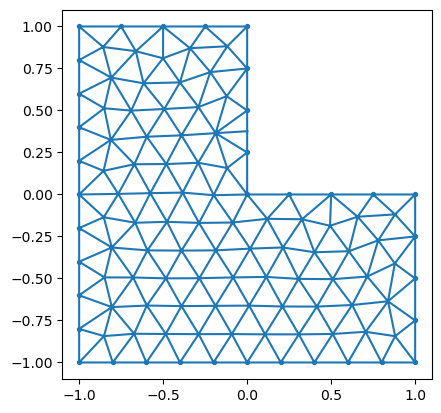

In [62]:
plt.scatter(pfix[:,0],pfix[:,1],s=8)
plt.triplot(pts[:,0],pts[:,1],tri)
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 10})

count =  200 displacement =  0.005920541539756017
count =  400 displacement =  0.004671202428186551


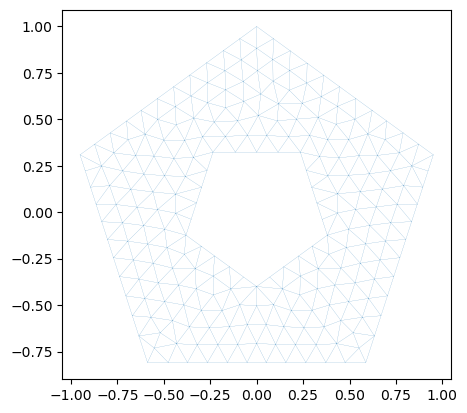

In [13]:
v_rad = np.linspace(0,2*np.pi,6)[:-1]

p_out = np.array(rad*np.array([np.cos(v_rad + np.pi/2), np.sin(v_rad + np.pi/2)]))
p_in = np.array(rad*0.4*np.array([np.cos(v_rad - np.pi/2), np.sin(v_rad - np.pi/2)]))

def dfunc(p):
    d0 = dpolygon(p, p_out.T,5)
    d1 = dpolygon(p, p_in.T,5)
    d = ddiff(d0, d1)
    return d

pfix = np.concatenate((p_out.T, p_in.T), axis = 0)

h0 = 0.1

xmin = -1
xmax = 1
ymin = -1
ymax = 1

bbox = [xmin,xmax,ymin,ymax] # the bounding box

pts,tri = distmesh2D(dfunc,huniform,h0,bbox,pfix)

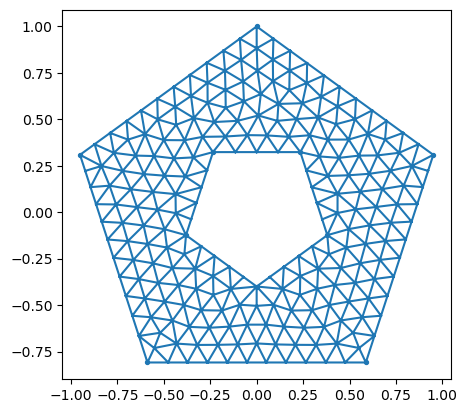

In [14]:
plt.scatter(pfix[:,0],pfix[:,1],s=8)
plt.triplot(pts[:,0],pts[:,1],tri)
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 10})

count =  200 displacement =  0.00503256593440711
count =  400 displacement =  0.005036393078666029


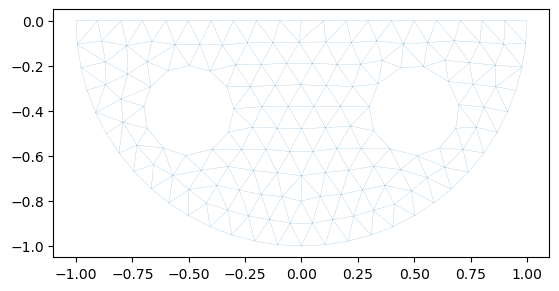

In [30]:
n = 11
t = np.linspace(0, (-1)*np.pi,n)
rad = 1.0
arc = np.concatenate((np.reshape(rad*np.cos(t),(n,1)),np.reshape(rad*np.sin(t),(n,1))),axis = 1)

zero_column = np.full_like(np.linspace(-1, 1, n) , 0)
l = np.column_stack((np.linspace(-1, 1, n), zero_column))[1:-1]

rad_eye_center = 0.5*rad
rad_eye = 0.2*rad

def dfunc(p):
    d0 = dcircle(p, 0, 0, rad)
    d1 = dcircle(p, -0.5, -0.4, rad_eye)
    d2 = dcircle(p, 0.5, -0.4, rad_eye)
    d3 = drectangle(p, -1, 1, 0, 1)
    d = ddiff(d0, dunion(dunion(d1,d2), d3))
    return d

pfix = np.concatenate((arc, l), axis = 0)

h0 = 0.1

xmin = -1
xmax = 1
ymin = -1
ymax = 1

bbox = [xmin,xmax,ymin,ymax] # the bounding box

pts,tri = distmesh2D(dfunc,huniform,h0,bbox,pfix)

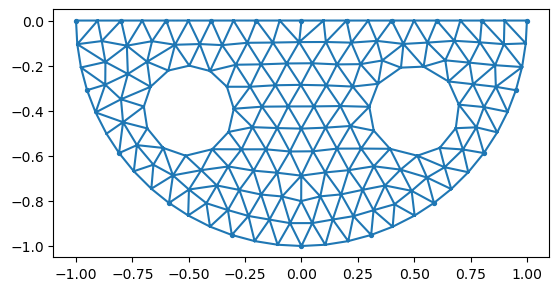

In [31]:
plt.scatter(pfix[:,0],pfix[:,1],s=8)
plt.triplot(pts[:,0],pts[:,1],tri)
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 10})